# Import module & data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler

In [2]:
test = pd.read_csv("./data/test.csv")
test = test.drop(columns=["id"])
train = pd.read_csv("./data/train.csv")
train = train.drop(columns=["id"])

In [3]:
test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [4]:
test.shape

(39098, 11)

In [5]:
train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [6]:
train.shape

(58645, 12)

# Preprocessing

### person_age

In [7]:
print(train['person_age'].value_counts().sort_index())

person_age
20       12
21     1795
22     7051
23     7726
24     6395
25     5067
26     3874
27     4450
28     3707
29     3270
30     2333
31     1917
32     1565
33     1306
34     1041
35      862
36     1117
37      992
38      745
39      536
40      438
41      433
42      291
43      320
44      229
45      163
46      164
47      125
48       97
49       59
50       63
51       69
52       62
53       75
54       60
55       34
56       29
57       25
58       35
59        6
60       28
61       13
62        7
64       10
65       13
66       11
69        6
70       10
73        3
76        1
80        2
84        2
123       1
Name: count, dtype: int64


In [8]:
print(test['person_age'].value_counts().sort_index())

person_age
20       2
21    1180
22    4616
23    5059
24    4305
25    3474
26    2578
27    3102
28    2454
29    2198
30    1531
31    1222
32    1037
33     863
34     673
35     585
36     771
37     670
38     531
39     359
40     268
41     287
42     189
43     213
44     131
45     113
46      89
47      94
48      66
49      51
50      34
51      55
52      44
53      39
54      38
55      34
56      20
57      22
58      26
59       5
60      17
61       8
62       6
63       1
64       4
65       7
66       8
68       1
69       5
70      11
84       1
94       1
Name: count, dtype: int64


In [9]:
# 5살 단위로 나이를 그룹화하되, 80살 이상은 하나로 묶어 새로운 열 추가
bins_5_years = list(range(20, 80, 5)) + [float('inf')]
labels_5_years = [f'{i}-{i+4}' for i in bins_5_years[:-2]] + ['80+']
train['age_group_5_years'] = pd.cut(train['person_age'], bins=bins_5_years, labels=labels_5_years, right=False)

# age_group_5_years를 ordinal encoding하여 새로운 열 추가
train['age_group_encoded'] = train['age_group_5_years'].cat.codes

# 기존 person_age 및 age_group_5_years 열 삭제
train = train.drop(columns=['person_age', 'age_group_5_years'])

train.head(20)

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,age_group_encoded
0,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0,3
1,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0,0
2,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0,1
3,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0,2
4,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0,0
5,45000,RENT,2.0,VENTURE,A,9000,8.94,0.20,N,5,0,1
6,45000,MORTGAGE,9.0,EDUCATION,A,12000,6.54,0.27,N,3,0,1
7,20000,RENT,0.0,PERSONAL,C,2500,13.49,0.13,Y,3,0,0
8,69600,RENT,11.0,EDUCATION,D,5000,14.84,0.07,Y,11,0,3
9,110000,MORTGAGE,0.0,DEBTCONSOLIDATION,C,15000,12.98,0.14,Y,6,0,3


In [10]:
# 1. 5살 단위로 나이를 그룹화하되, 80살 이상은 하나로 묶어 새로운 열 추가
test['age_group_5_years'] = pd.cut(test['person_age'], bins=bins_5_years, labels=labels_5_years, right=False)

# 2. age_group_5_years를 ordinal encoding하여 새로운 열 추가
test['age_group_encoded'] = test['age_group_5_years'].cat.codes

# 기존 person_age 및 age_group_5_years 열 삭제
test = test.drop(columns=['person_age', 'age_group_5_years'])

# 결과 확인
test.head(20)

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group_encoded
0,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,0
1,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,1
2,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2,1
3,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,2
4,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,1
5,66000,RENT,5.0,EDUCATION,D,22000,14.09,0.33,N,2,0
6,75000,OWN,10.0,PERSONAL,B,8000,10.62,0.11,N,4,1
7,55000,MORTGAGE,6.0,PERSONAL,A,6250,6.76,0.12,N,2,0
8,29124,RENT,0.0,PERSONAL,C,7200,13.11,0.26,Y,6,2
9,90000,RENT,4.0,DEBTCONSOLIDATION,C,10000,13.49,0.11,Y,3,0


### person_income

In [11]:
print(train['person_income'].value_counts().sort_index())

person_income
4200        1
5000        1
9600       14
10000       1
10140       1
           ..
948000      1
1200000     2
1824000     1
1839784     1
1900000     1
Name: count, Length: 2641, dtype: int64


In [12]:
print(test['person_income'].value_counts().sort_index())

person_income
4000       1
4200       1
4800       2
5700       1
9600       4
          ..
852240     1
900000     1
1200000    2
1782000    1
1900000    1
Name: count, Length: 2196, dtype: int64


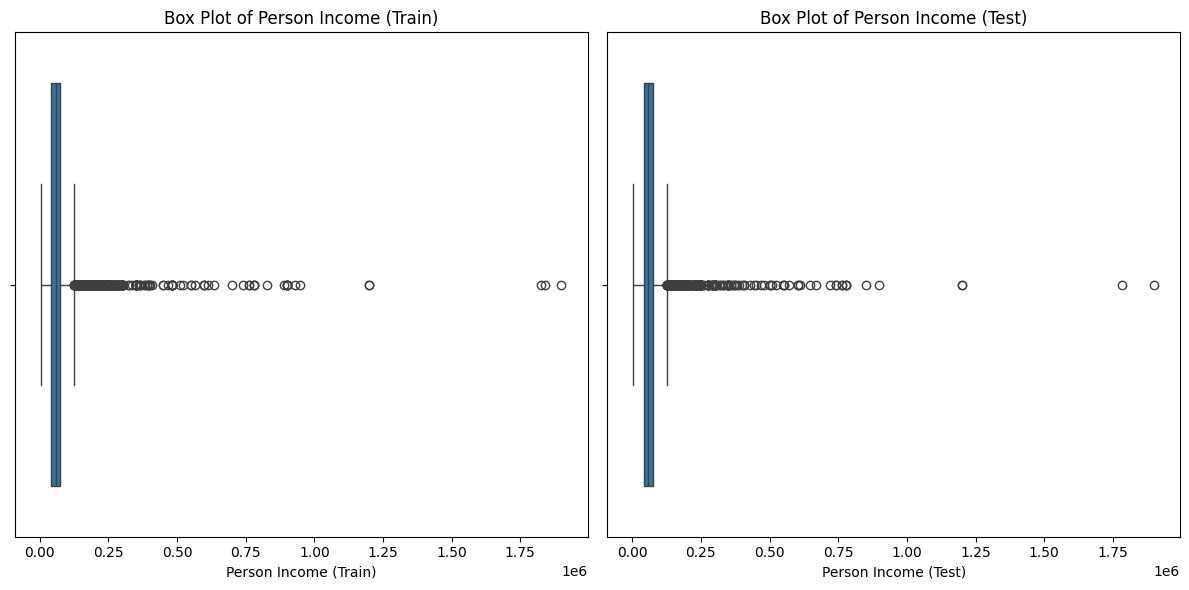

In [13]:
plt.figure(figsize=(12, 6))

# Train 데이터의 Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=train['person_income'])
plt.xlabel('Person Income (Train)')
plt.title('Box Plot of Person Income (Train)')

# Test 데이터의 Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=test['person_income'])
plt.xlabel('Person Income (Test)')
plt.title('Box Plot of Person Income (Test)')

plt.tight_layout()
plt.show()

In [14]:
train['person_income_log'] = np.log1p(train['person_income'])

# 로그 변환된 person_income에 Robust Scaler 적용 (원래 열은 유지)
scaler = RobustScaler()
train['person_income_scaled'] = scaler.fit_transform(train[['person_income_log']])

# high_income_flag 특성 이진화 추가 (원래 person_income에서 Q3 + 1.5 * IQR을 기준으로 판단)
Q1 = train['person_income'].quantile(0.25)
Q3 = train['person_income'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
train['high_income_flag'] = (train['person_income'] > upper_bound).astype(int)

In [15]:
# 1. 테스트 데이터에 로그 변환 적용
test['person_income_log'] = np.log1p(test['person_income'])

# 2. 로그 변환된 person_income에 대해 train에서 학습된 Scaler 적용 (fit 없이 transform만 사용)
test['person_income_scaled'] = scaler.transform(test[['person_income_log']])

# 3. high_income_flag 특성 이진화 (train에서 계산된 upper_bound 사용)
test['high_income_flag'] = (test['person_income'] > upper_bound).astype(int)

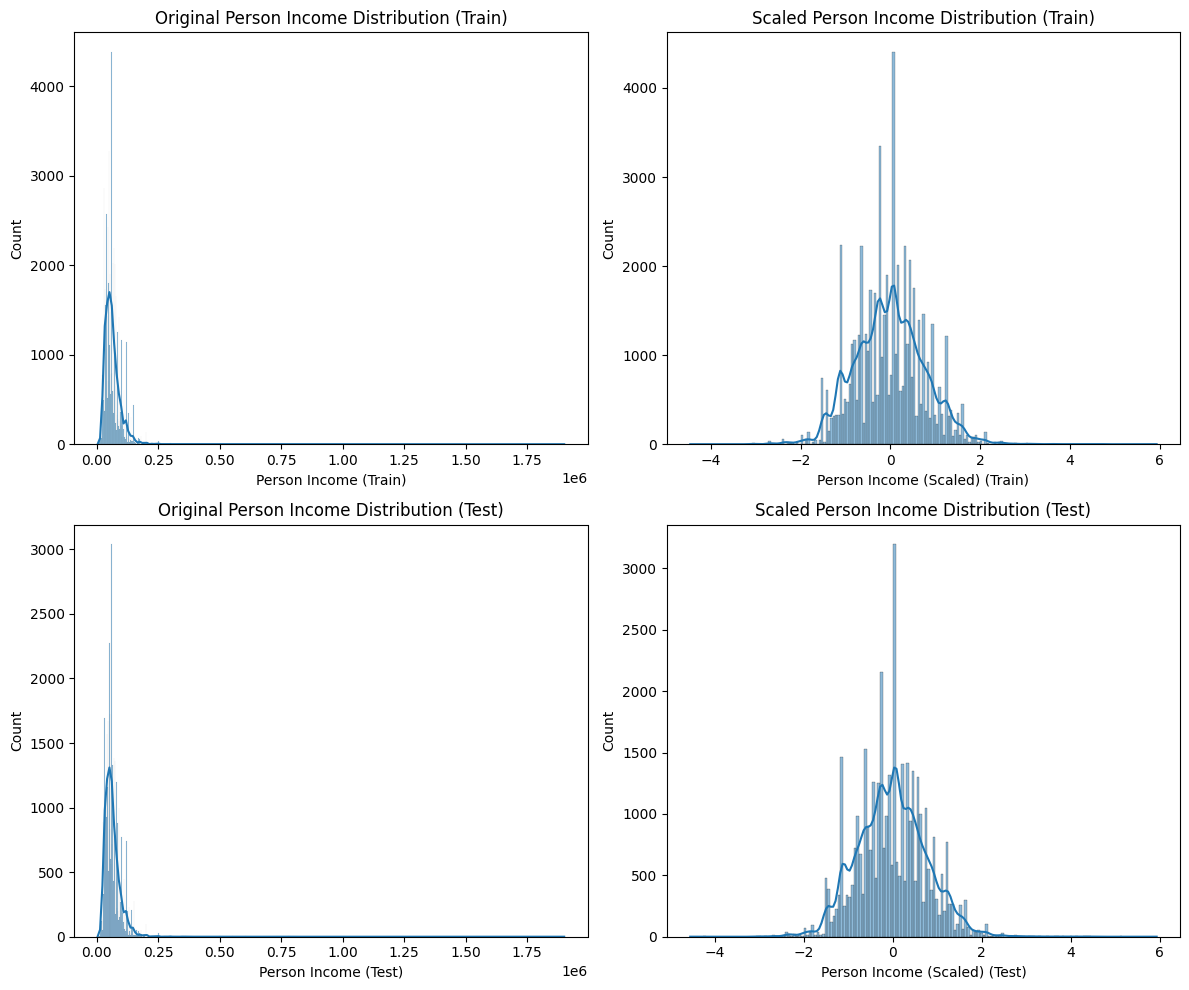

In [16]:
plt.figure(figsize=(12, 10))

# Train 데이터의 원본과 스케일링된 분포 시각화
plt.subplot(2, 2, 1)
sns.histplot(train['person_income'], kde=True)
plt.xlabel('Person Income (Train)')
plt.title('Original Person Income Distribution (Train)')

plt.subplot(2, 2, 2)
sns.histplot(train['person_income_scaled'], kde=True)
plt.xlabel('Person Income (Scaled) (Train)')
plt.title('Scaled Person Income Distribution (Train)')

# Test 데이터의 원본과 스케일링된 분포 시각화
plt.subplot(2, 2, 3)
sns.histplot(test['person_income'], kde=True)
plt.xlabel('Person Income (Test)')
plt.title('Original Person Income Distribution (Test)')

plt.subplot(2, 2, 4)
sns.histplot(test['person_income_scaled'], kde=True)
plt.xlabel('Person Income (Scaled) (Test)')
plt.title('Scaled Person Income Distribution (Test)')

plt.tight_layout()
plt.show()

In [17]:
train.drop(columns=["person_income", "person_income_log"], inplace=True)
test.drop(columns=["person_income", "person_income_log"], inplace=True)

### person_home_ownership

In [18]:
print(train['person_home_ownership'].value_counts().sort_index())

person_home_ownership
MORTGAGE    24824
OTHER          89
OWN          3138
RENT        30594
Name: count, dtype: int64


In [19]:
print(test['person_home_ownership'].value_counts().sort_index())

person_home_ownership
MORTGAGE    16683
OTHER          79
OWN          2056
RENT        20280
Name: count, dtype: int64


In [20]:
# person_home_ownership에 원-핫 인코딩 적용
train = pd.get_dummies(train, columns=['person_home_ownership'], prefix='home')
train.head(20)

,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,age_group_encoded,person_income_scaled,high_income_flag,home_MORTGAGE,home_OTHER,home_OWN,home_RENT
0,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0,3,-0.859313,0,False,False,False,True
1,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0,0,-0.059701,0,False,False,True,False
2,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0,1,-1.191015,0,False,False,True,False
3,14.0,VENTURE,B,12000,11.11,0.17,N,5,0,2,0.319934,0,False,False,False,True
4,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0,0,0.057677,0,False,False,False,True
5,2.0,VENTURE,A,9000,8.94,0.20,N,5,0,1,-0.431755,0,False,False,False,True
6,9.0,EDUCATION,A,12000,6.54,0.27,N,3,0,1,-0.431755,0,True,False,False,False
7,0.0,PERSONAL,C,2500,13.49,0.13,Y,3,0,0,-1.811367,0,False,False,False,True
8,11.0,EDUCATION,D,5000,14.84,0.07,Y,11,0,3,0.310184,0,False,False,False,True
9,0.0,DEBTCONSOLIDATION,C,15000,12.98,0.14,Y,6,0,3,1.088900,0,True,False,False,False


In [21]:
test = pd.get_dummies(test, columns=['person_home_ownership'], prefix='home')

### person_emp_length

In [22]:
print(train['person_emp_length'].value_counts().sort_index())

person_emp_length
0.0      7586
1.0      5203
2.0      7270
3.0      6475
4.0      5461
5.0      5839
6.0      4902
7.0      4275
8.0      3015
9.0      2290
10.0     1072
11.0     1491
12.0     1105
13.0      797
14.0      590
15.0      367
16.0      280
17.0      168
18.0      153
19.0       72
20.0       65
21.0       78
22.0       20
23.0       12
24.0       14
25.0        8
26.0       11
27.0        7
28.0        4
29.0        2
30.0        2
31.0        5
35.0        1
39.0        1
41.0        2
123.0       2
Name: count, dtype: int64


In [23]:
print(test['person_emp_length'].value_counts().sort_index())

person_emp_length
0.0     5105
1.0     3413
2.0     4817
3.0     4393
4.0     3548
5.0     3844
6.0     3423
7.0     2714
8.0     2034
9.0     1656
10.0     737
11.0    1009
12.0     731
13.0     546
14.0     350
15.0     210
16.0     134
17.0     125
18.0      94
19.0      57
20.0      56
21.0      45
22.0      18
23.0      13
24.0       8
25.0       3
26.0       4
28.0       3
29.0       1
31.0       6
42.0       1
Name: count, dtype: int64


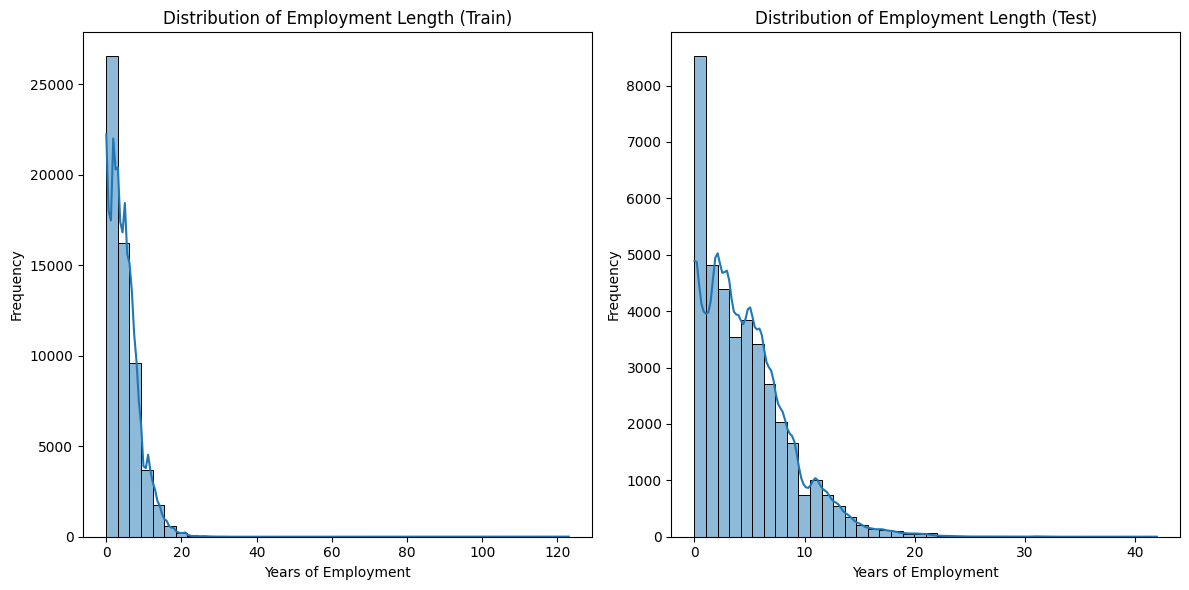

In [24]:
plt.figure(figsize=(12, 6))

# Train 데이터의 고용 기간 분포 시각화
plt.subplot(1, 2, 1)
sns.histplot(data=train, x='person_emp_length', bins=40, kde=True)
plt.title('Distribution of Employment Length (Train)')
plt.xlabel('Years of Employment')
plt.ylabel('Frequency')

# Test 데이터의 고용 기간 분포 시각화
plt.subplot(1, 2, 2)
sns.histplot(data=test, x='person_emp_length', bins=40, kde=True)
plt.title('Distribution of Employment Length (Test)')
plt.xlabel('Years of Employment')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
# 고용 기간을 구간으로 나누기 (10+년 구간 추가)
bins_emp_length = [0, 1, 5, 10, float('inf')]
labels_emp_length = ['1 year', '2-5 years', '6-10 years', '10+ years']

# person_emp_length를 범주화하고 해당 열을 추가
train['emp_length_group'] = pd.cut(train['person_emp_length'], bins=bins_emp_length, labels=labels_emp_length, right=False)

# Ordinal 인코딩 (각 범주를 숫자로 변환)
ordinal_mapping = {'1 year': 0, '2-5 years': 1, '6-10 years': 2, '10+ years': 3}
train['emp_length_encoded'] = train['emp_length_group'].map(ordinal_mapping)

# 기존 열 삭제
train.drop(columns=["person_emp_length", "emp_length_group"], inplace=True)

In [26]:
# Test 데이터에 동일한 구간으로 고용 기간을 범주화
test['emp_length_group'] = pd.cut(test['person_emp_length'], bins=bins_emp_length, labels=labels_emp_length, right=False)

# Test 데이터에 Ordinal 인코딩 적용 (train과 동일한 매핑 사용)
test['emp_length_encoded'] = test['emp_length_group'].map(ordinal_mapping)

# 기존 열 삭제
test.drop(columns=["person_emp_length", "emp_length_group"], inplace=True)

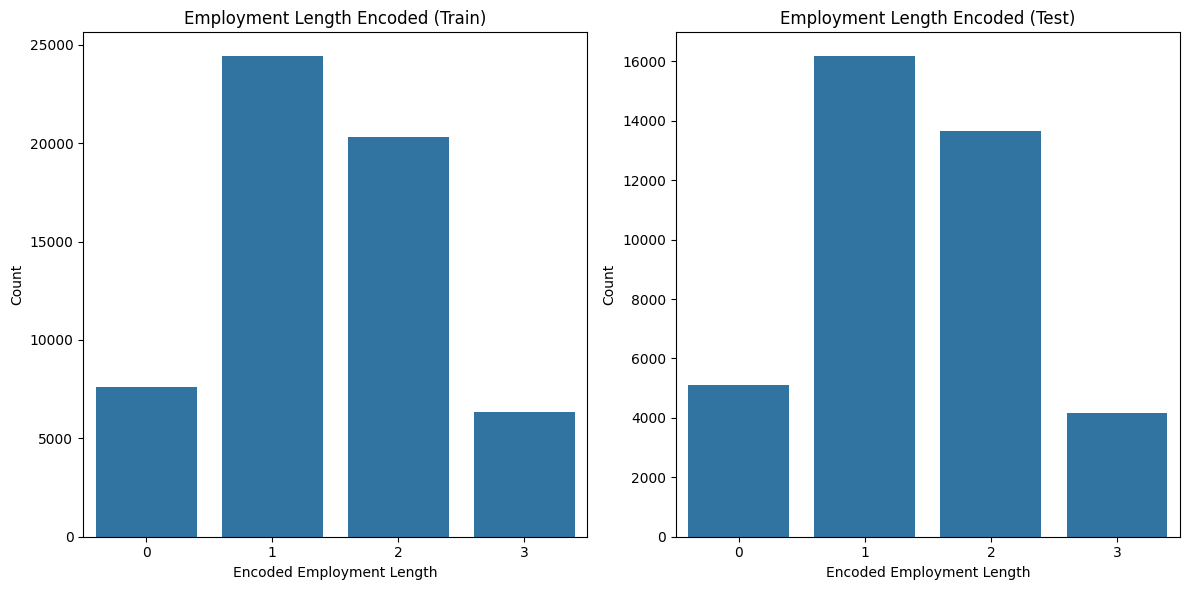

In [27]:
# Train과 Test 데이터의 고용 기간 인코딩 결과 시각화
plt.figure(figsize=(12, 6))

# Train 데이터의 고용 기간 인코딩된 결과 시각화
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='emp_length_encoded')
plt.title('Employment Length Encoded (Train)')
plt.xlabel('Encoded Employment Length')
plt.ylabel('Count')

# Test 데이터의 고용 기간 인코딩된 결과 시각화
plt.subplot(1, 2, 2)
sns.countplot(data=test, x='emp_length_encoded')
plt.title('Employment Length Encoded (Test)')
plt.xlabel('Encoded Employment Length')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### loan_intent

In [28]:
print(train['loan_intent'].value_counts().sort_index())

loan_intent
DEBTCONSOLIDATION     9133
EDUCATION            12271
HOMEIMPROVEMENT       6280
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
Name: count, dtype: int64


In [29]:
print(test['loan_intent'].value_counts().sort_index())

loan_intent
DEBTCONSOLIDATION    5915
EDUCATION            8076
HOMEIMPROVEMENT      4213
MEDICAL              7447
PERSONAL             6815
VENTURE              6632
Name: count, dtype: int64


In [30]:
# loan_intent에 One-Hot Encoding 적용
train = pd.get_dummies(train, columns=['loan_intent'], prefix='intent', drop_first=False)
test = pd.get_dummies(test, columns=['loan_intent'], prefix='intent', drop_first=False)

### loan_grade

In [31]:
print(train['loan_grade'].value_counts().sort_index())

loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64


In [32]:
print(test['loan_grade'].value_counts().sort_index())

loan_grade
A    14005
B    13604
C     7460
D     3269
E      637
F      105
G       18
Name: count, dtype: int64


In [33]:
# Ordinal Encoding 적용
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
train['loan_grade'] = train['loan_grade'].map(grade_mapping)
test['loan_grade'] = test['loan_grade'].map(grade_mapping)

In [34]:
train.head(20)

,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,age_group_encoded,person_income_scaled,high_income_flag,...,home_OTHER,home_OWN,home_RENT,emp_length_encoded,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE
0,1,6000,11.49,0.17,N,14,0,3,-0.859313,0,...,False,False,True,0,False,True,False,False,False,False
1,2,4000,13.35,0.07,N,2,0,0,-0.059701,0,...,False,True,False,2,False,False,False,True,False,False
2,0,6000,8.90,0.21,N,10,0,1,-1.191015,0,...,False,True,False,2,False,False,False,False,True,False
3,1,12000,11.11,0.17,N,5,0,2,0.319934,0,...,False,False,True,3,False,False,False,False,False,True
4,0,6000,6.92,0.10,N,3,0,0,0.057677,0,...,False,False,True,1,False,False,False,True,False,False
5,0,9000,8.94,0.20,N,5,0,1,-0.431755,0,...,False,False,True,1,False,False,False,False,False,True
6,0,12000,6.54,0.27,N,3,0,1,-0.431755,0,...,False,False,False,2,False,True,False,False,False,False
7,2,2500,13.49,0.13,Y,3,0,0,-1.811367,0,...,False,False,True,0,False,False,False,False,True,False
8,3,5000,14.84,0.07,Y,11,0,3,0.310184,0,...,False,False,True,3,False,True,False,False,False,False
9,2,15000,12.98,0.14,Y,6,0,3,1.088900,0,...,False,False,False,0,True,False,False,False,False,False


In [35]:
test.head(20)

,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group_encoded,person_income_scaled,high_income_flag,home_MORTGAGE,home_OTHER,home_OWN,home_RENT,emp_length_encoded,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE
0,5,25000,15.76,0.36,N,2,0,0.295454,0,False,False,False,True,1,False,False,True,False,False,False
1,2,10000,12.68,0.10,Y,4,1,0.857296,0,True,False,False,False,2,False,False,False,False,True,False
2,4,4000,17.19,0.13,Y,2,1,-1.121566,0,False,False,False,True,2,False,False,False,False,False,True
3,0,7000,8.90,0.14,N,7,2,-0.252506,0,False,False,False,True,1,True,False,False,False,False,False
4,3,15000,16.32,0.15,Y,4,1,0.960438,0,True,False,False,False,2,False,False,True,False,False,False
5,3,22000,14.09,0.33,N,2,0,0.219828,0,False,False,False,True,2,False,True,False,False,False,False
6,1,8000,10.62,0.11,N,4,1,0.437311,0,False,False,True,False,3,False,False,False,False,True,False
7,0,6250,6.76,0.12,N,2,0,-0.090356,0,True,False,False,False,2,False,False,False,False,True,False
8,2,7200,13.11,0.26,Y,6,2,-1.171983,0,False,False,False,True,0,False,False,False,False,True,False
9,2,10000,13.49,0.11,Y,3,0,0.747496,0,False,False,False,True,1,True,False,False,False,False,False


### loan_amnt

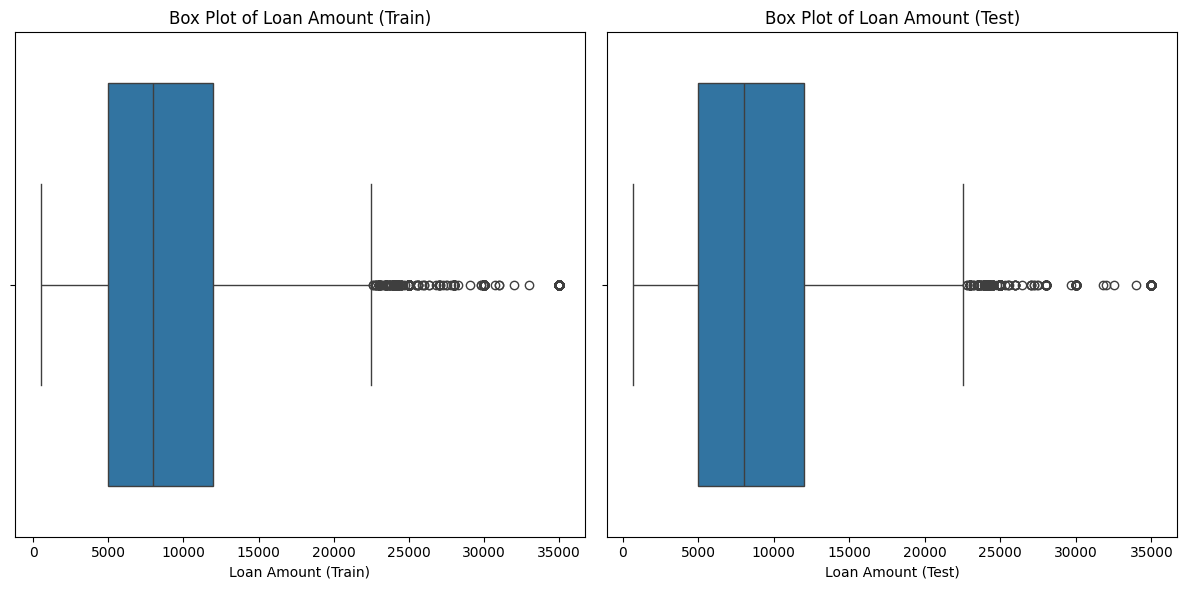

In [36]:
plt.figure(figsize=(12, 6))

# Train 데이터의 Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=train['loan_amnt'])
plt.xlabel('Loan Amount (Train)')
plt.title('Box Plot of Loan Amount (Train)')

# Test 데이터의 Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=test['loan_amnt'])
plt.xlabel('Loan Amount (Test)')
plt.title('Box Plot of Loan Amount (Test)')

plt.tight_layout()
plt.show()

In [37]:
# 1. loan_amnt의 로그 변환
train['loan_amnt_log'] = np.log1p(train['loan_amnt'])

# 2. 로그 변환된 loan_amnt에 대해 Robust Scaler 적용
scaler = RobustScaler()
train['loan_amnt_scaled'] = scaler.fit_transform(train[['loan_amnt_log']])

# 3. high_income_flag 대신 loan_amnt의 이상치를 Q3 + 1.5 * IQR 기준으로 이진화
Q1 = train['loan_amnt'].quantile(0.25)
Q3 = train['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
train['high_loan_flag'] = (train['loan_amnt'] > upper_bound).astype(int)

In [38]:
# 1. loan_amnt의 로그 변환
test['loan_amnt_log'] = np.log1p(test['loan_amnt'])

# 2. Test 데이터에 train 데이터로 학습된 Scaler 적용
test['loan_amnt_scaled'] = scaler.transform(test[['loan_amnt_log']])

# 3. Test 데이터에 동일한 기준으로 high_loan_flag 적용
test['high_loan_flag'] = (test['loan_amnt'] > upper_bound).astype(int)

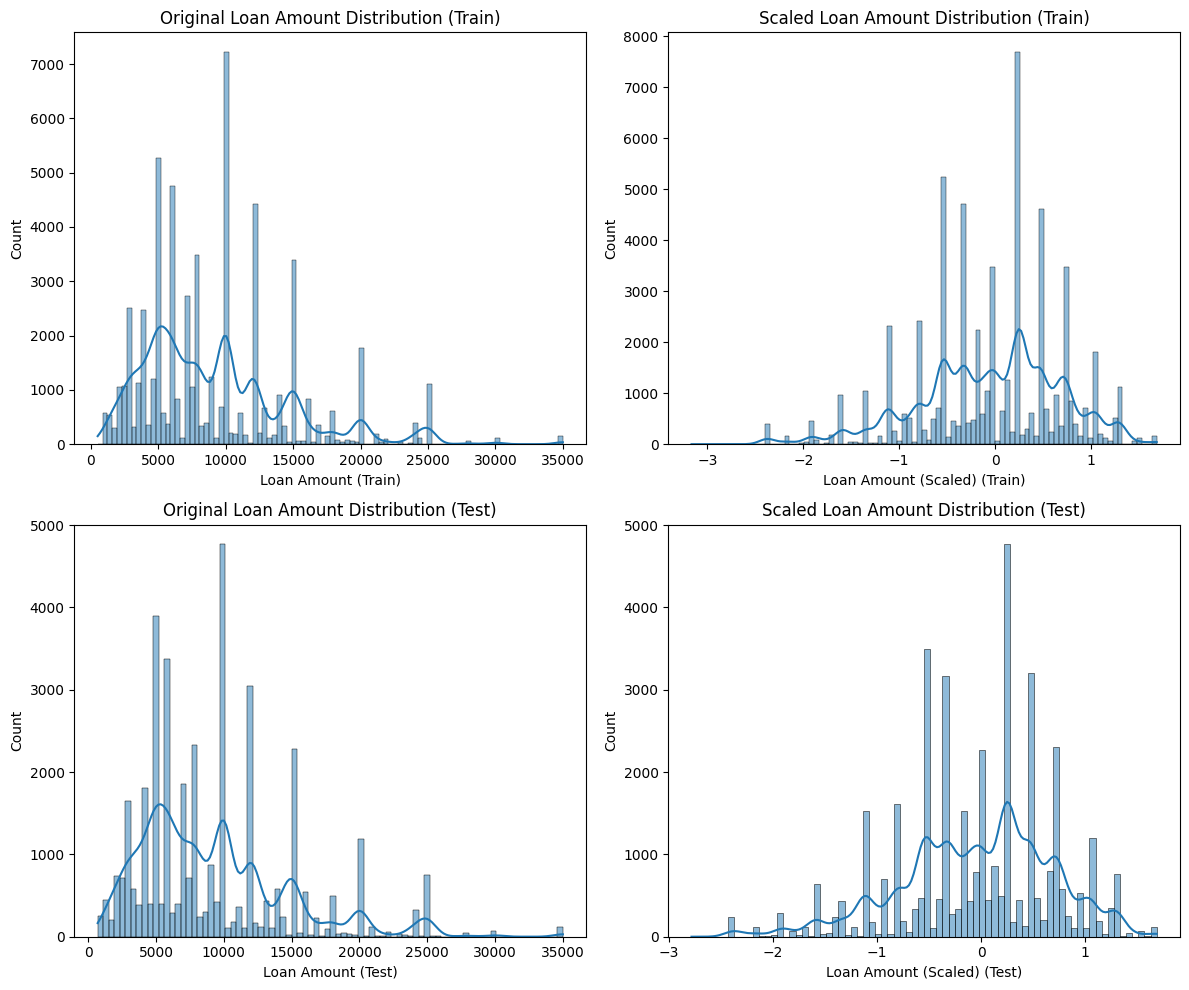

In [39]:
# Train과 Test 데이터의 원본 및 스케일링된 분포 시각화
plt.figure(figsize=(12, 10))

# Train 데이터의 원본 분포 시각화
plt.subplot(2, 2, 1)
sns.histplot(train['loan_amnt'], kde=True)
plt.xlabel('Loan Amount (Train)')
plt.title('Original Loan Amount Distribution (Train)')

# Train 데이터의 스케일링된 분포 시각화
plt.subplot(2, 2, 2)
sns.histplot(train['loan_amnt_scaled'], kde=True)
plt.xlabel('Loan Amount (Scaled) (Train)')
plt.title('Scaled Loan Amount Distribution (Train)')

# Test 데이터의 원본 분포 시각화
plt.subplot(2, 2, 3)
sns.histplot(test['loan_amnt'], kde=True)
plt.xlabel('Loan Amount (Test)')
plt.title('Original Loan Amount Distribution (Test)')

# Test 데이터의 스케일링된 분포 시각화
plt.subplot(2, 2, 4)
sns.histplot(test['loan_amnt_scaled'], kde=True)
plt.xlabel('Loan Amount (Scaled) (Test)')
plt.title('Scaled Loan Amount Distribution (Test)')

plt.tight_layout()
plt.show()

In [40]:
train.drop(columns=["loan_amnt", "loan_amnt_log"], inplace=True)
test.drop(columns=["loan_amnt", "loan_amnt_log"], inplace=True)

In [41]:
train.head(20)

,loan_grade,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,age_group_encoded,person_income_scaled,high_income_flag,home_MORTGAGE,...,home_RENT,emp_length_encoded,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE,loan_amnt_scaled,high_loan_flag
0,1,11.49,0.17,N,14,0,3,-0.859313,0,False,...,True,0,False,True,False,False,False,False,-0.328600,0
1,2,13.35,0.07,N,2,0,0,-0.059701,0,False,...,False,2,False,False,False,True,False,False,-0.791707,0
2,0,8.90,0.21,N,10,0,1,-1.191015,0,False,...,False,2,False,False,False,False,True,False,-0.328600,0
3,1,11.11,0.17,N,5,0,2,0.319934,0,False,...,True,3,False,False,False,False,False,True,0.463155,0
4,0,6.92,0.10,N,3,0,0,0.057677,0,False,...,True,1,False,False,False,True,False,False,-0.328600,0
5,0,8.94,0.20,N,5,0,1,-0.431755,0,False,...,True,1,False,False,False,False,False,True,0.134539,0
6,0,6.54,0.27,N,3,0,1,-0.431755,0,True,...,False,2,False,True,False,False,False,False,0.463155,0
7,2,13.49,0.13,Y,3,0,0,-1.811367,0,False,...,True,0,False,False,False,False,True,False,-1.328466,0
8,3,14.84,0.07,Y,11,0,3,0.310184,0,False,...,True,3,False,True,False,False,False,False,-0.536845,0
9,2,12.98,0.14,Y,6,0,3,1.088900,0,True,...,False,0,True,False,False,False,False,False,0.718054,0


### loan_int_rate

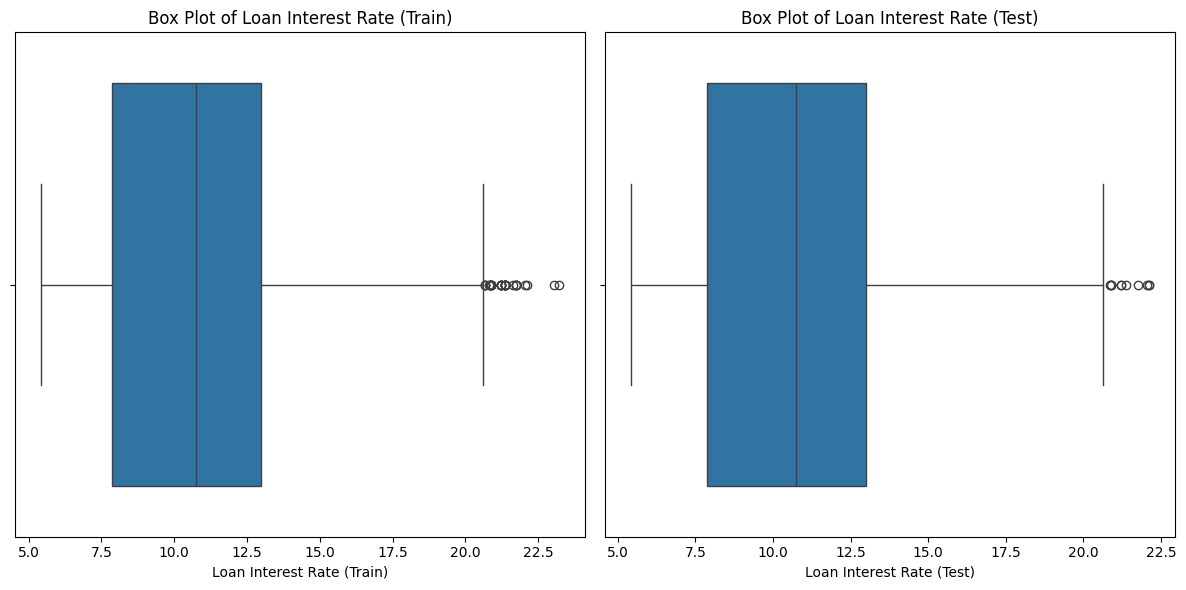

In [42]:
plt.figure(figsize=(12, 6))

# Train 데이터의 Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=train['loan_int_rate'])
plt.xlabel('Loan Interest Rate (Train)')
plt.title('Box Plot of Loan Interest Rate (Train)')

# Test 데이터의 Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=test['loan_int_rate'])
plt.xlabel('Loan Interest Rate (Test)')
plt.title('Box Plot of Loan Interest Rate (Test)')

plt.tight_layout()
plt.show()

In [43]:
# Train 데이터에 대한 처리
# 1. loan_int_rate의 로그 변환
train['loan_int_rate_log'] = np.log1p(train['loan_int_rate'])

# 2. 로그 변환된 loan_int_rate에 대해 Robust Scaler 적용
scaler = RobustScaler()
train['loan_int_rate_scaled'] = scaler.fit_transform(train[['loan_int_rate_log']])

# 3. loan_int_rate의 이상치를 Q3 + 1.5 * IQR 기준으로 이진화
Q1 = train['loan_int_rate'].quantile(0.25)
Q3 = train['loan_int_rate'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
train['high_int_rate_flag'] = (train['loan_int_rate'] > upper_bound).astype(int)

In [44]:
# Test 데이터에 동일한 처리 적용
# 1. loan_int_rate의 로그 변환
test['loan_int_rate_log'] = np.log1p(test['loan_int_rate'])

# 2. Test 데이터에 train 데이터로 학습된 Scaler 적용
test['loan_int_rate_scaled'] = scaler.transform(test[['loan_int_rate_log']])

# 3. Test 데이터에 동일한 기준으로 high_int_rate_flag 적용
test['high_int_rate_flag'] = (test['loan_int_rate'] > upper_bound).astype(int)

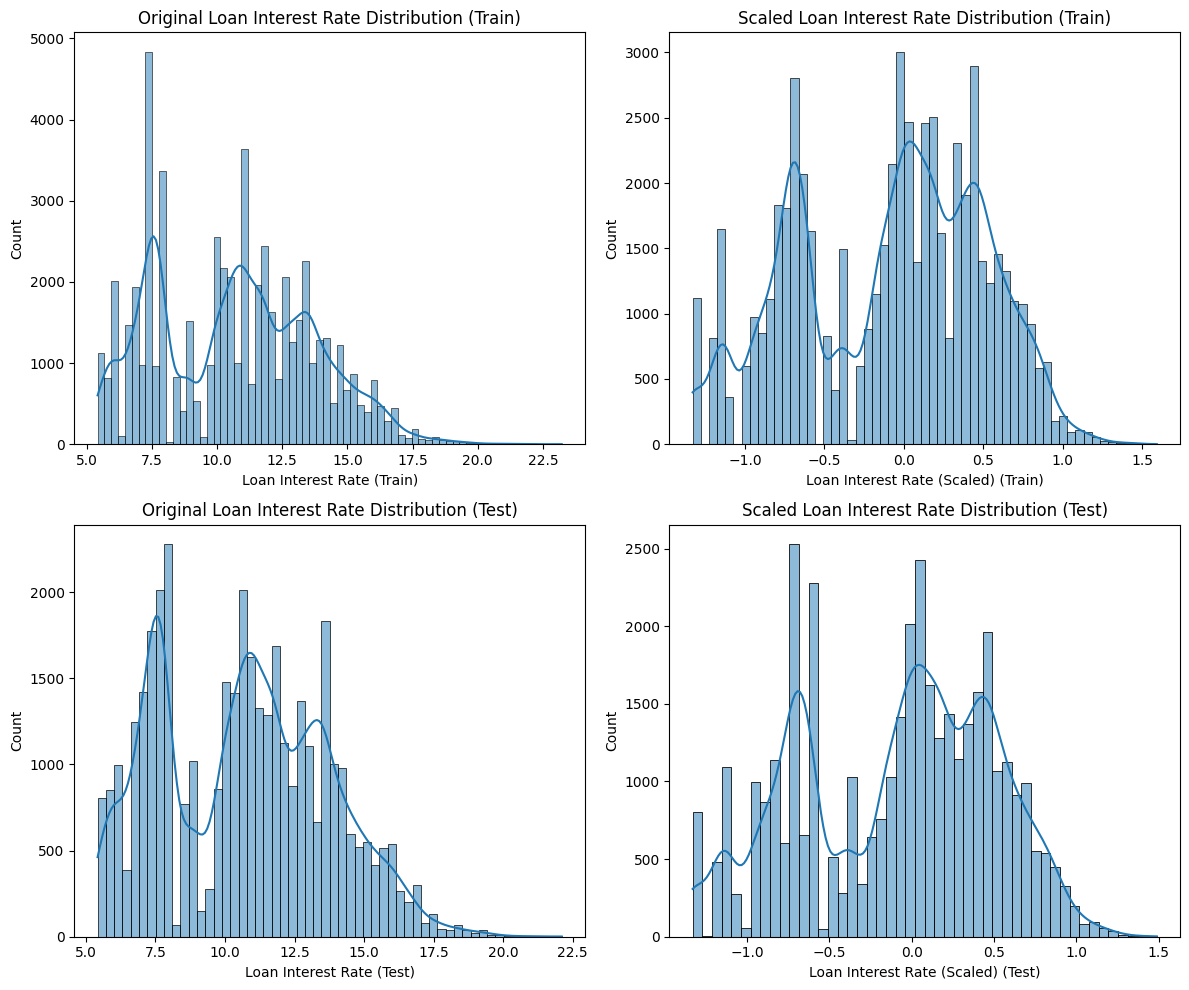

In [45]:
# Train과 Test 데이터의 원본 및 스케일링된 분포 시각화
plt.figure(figsize=(12, 10))

# Train 데이터의 원본 분포 시각화
plt.subplot(2, 2, 1)
sns.histplot(train['loan_int_rate'], kde=True)
plt.xlabel('Loan Interest Rate (Train)')
plt.title('Original Loan Interest Rate Distribution (Train)')

# Train 데이터의 스케일링된 분포 시각화
plt.subplot(2, 2, 2)
sns.histplot(train['loan_int_rate_scaled'], kde=True)
plt.xlabel('Loan Interest Rate (Scaled) (Train)')
plt.title('Scaled Loan Interest Rate Distribution (Train)')

# Test 데이터의 원본 분포 시각화
plt.subplot(2, 2, 3)
sns.histplot(test['loan_int_rate'], kde=True)
plt.xlabel('Loan Interest Rate (Test)')
plt.title('Original Loan Interest Rate Distribution (Test)')

# Test 데이터의 스케일링된 분포 시각화
plt.subplot(2, 2, 4)
sns.histplot(test['loan_int_rate_scaled'], kde=True)
plt.xlabel('Loan Interest Rate (Scaled) (Test)')
plt.title('Scaled Loan Interest Rate Distribution (Test)')

plt.tight_layout()
plt.show()

In [46]:
train.drop(columns=["loan_int_rate", "loan_int_rate_log"], inplace=True)
test.drop(columns=["loan_int_rate", "loan_int_rate_log"], inplace=True)

### loan_percent_income

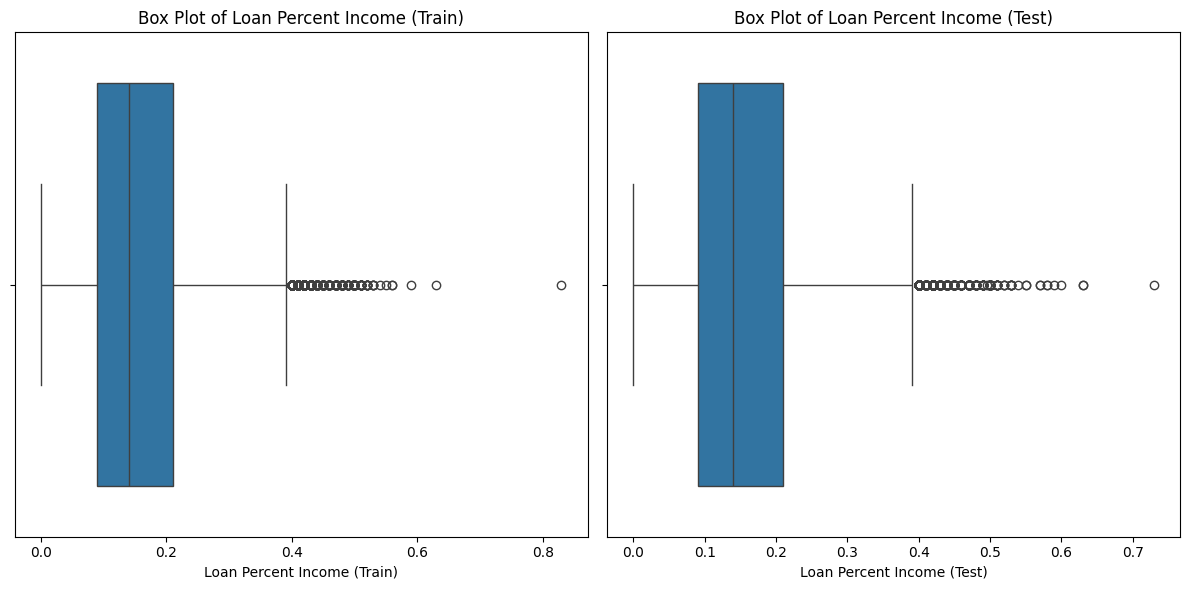

In [47]:
# loan_percent_income에 대한 Boxplot 시각화
plt.figure(figsize=(12, 6))

# Train 데이터의 Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=train['loan_percent_income'])
plt.xlabel('Loan Percent Income (Train)')
plt.title('Box Plot of Loan Percent Income (Train)')

# Test 데이터의 Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=test['loan_percent_income'])
plt.xlabel('Loan Percent Income (Test)')
plt.title('Box Plot of Loan Percent Income (Test)')

plt.tight_layout()
plt.show()

In [48]:
# Train 데이터에 대한 처리
# 1. loan_percent_income의 로그 변환
train['loan_percent_income_log'] = np.log1p(train['loan_percent_income'])

# 2. 로그 변환된 loan_percent_income에 대해 Robust Scaler 적용
scaler = RobustScaler()
train['loan_percent_income_scaled'] = scaler.fit_transform(train[['loan_percent_income_log']])

# 3. loan_percent_income의 이상치를 Q3 + 1.5 * IQR 기준으로 이진화
Q1 = train['loan_percent_income'].quantile(0.25)
Q3 = train['loan_percent_income'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
train['high_loan_percent_income_flag'] = (train['loan_percent_income'] > upper_bound).astype(int)

In [49]:
# Test 데이터에 동일한 처리 적용
# 1. loan_percent_income의 로그 변환
test['loan_percent_income_log'] = np.log1p(test['loan_percent_income'])

# 2. Test 데이터에 train 데이터로 학습된 Scaler 적용
test['loan_percent_income_scaled'] = scaler.transform(test[['loan_percent_income_log']])

# 3. Test 데이터에 동일한 기준으로 high_loan_percent_income_flag 적용
test['high_loan_percent_income_flag'] = (test['loan_percent_income'] > upper_bound).astype(int)

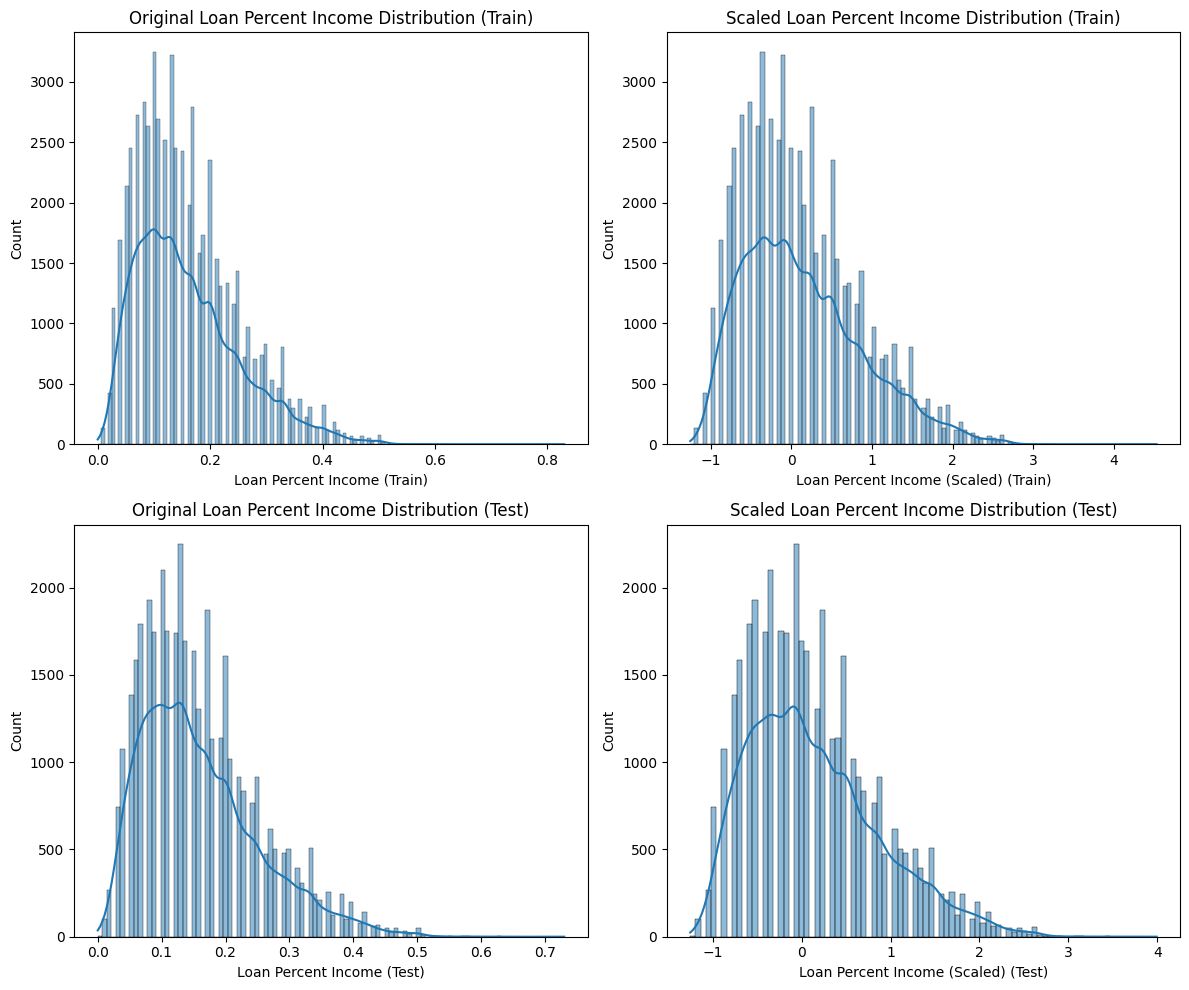

In [50]:
# Train과 Test 데이터의 원본 및 스케일링된 분포 시각화
plt.figure(figsize=(12, 10))

# Train 데이터의 원본 분포 시각화
plt.subplot(2, 2, 1)
sns.histplot(train['loan_percent_income'], kde=True)
plt.xlabel('Loan Percent Income (Train)')
plt.title('Original Loan Percent Income Distribution (Train)')

# Train 데이터의 스케일링된 분포 시각화
plt.subplot(2, 2, 2)
sns.histplot(train['loan_percent_income_scaled'], kde=True)
plt.xlabel('Loan Percent Income (Scaled) (Train)')
plt.title('Scaled Loan Percent Income Distribution (Train)')

# Test 데이터의 원본 분포 시각화
plt.subplot(2, 2, 3)
sns.histplot(test['loan_percent_income'], kde=True)
plt.xlabel('Loan Percent Income (Test)')
plt.title('Original Loan Percent Income Distribution (Test)')

# Test 데이터의 스케일링된 분포 시각화
plt.subplot(2, 2, 4)
sns.histplot(test['loan_percent_income_scaled'], kde=True)
plt.xlabel('Loan Percent Income (Scaled) (Test)')
plt.title('Scaled Loan Percent Income Distribution (Test)')

plt.tight_layout()
plt.show()

In [51]:
train.drop(columns=["loan_percent_income", "loan_percent_income_log"], inplace=True)
test.drop(columns=["loan_percent_income", "loan_percent_income_log"], inplace=True)

In [52]:
train.head(20)

,loan_grade,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,age_group_encoded,person_income_scaled,high_income_flag,home_MORTGAGE,home_OTHER,home_OWN,...,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE,loan_amnt_scaled,high_loan_flag,loan_int_rate_scaled,high_int_rate_flag,loan_percent_income_scaled,high_loan_percent_income_flag
0,1,N,14,0,3,-0.859313,0,False,False,False,...,False,False,False,False,-0.328600,0,0.134366,0,0.248706,0
1,2,N,2,0,0,-0.059701,0,False,False,True,...,False,True,False,False,-0.791707,0,0.439777,0,-0.606741,0
2,0,N,10,0,1,-1.191015,0,False,False,True,...,False,False,True,False,-0.328600,0,-0.376904,0,0.570572,0
3,1,N,5,0,2,0.319934,0,False,False,False,...,False,False,False,True,0.463155,0,0.066393,0,0.248706,0
4,0,N,3,0,0,0.057677,0,False,False,False,...,False,True,False,False,-0.328600,0,-0.867825,0,-0.341987,0
5,0,N,5,0,1,-0.431755,0,False,False,False,...,False,False,False,True,0.134539,0,-0.368033,0,0.491114,0
6,0,N,3,0,1,-0.431755,0,True,False,False,...,False,False,False,False,0.463155,0,-0.975997,0,1.033951,0
7,2,Y,3,0,0,-1.811367,0,False,False,False,...,False,False,True,False,-1.328466,0,0.461136,0,-0.084359,0
8,3,Y,11,0,3,0.310184,0,False,False,False,...,False,False,False,False,-0.536845,0,0.657113,0,-0.606741,0
9,2,Y,6,0,3,1.088900,0,True,False,False,...,False,False,False,False,0.718054,0,0.382307,0,0.000000,0


### cb_person_default_on_file

In [53]:
print(train['cb_person_default_on_file'].value_counts().sort_index())

cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64


In [54]:
print(test['cb_person_default_on_file'].value_counts().sort_index())

cb_person_default_on_file
N    33227
Y     5871
Name: count, dtype: int64


In [55]:
# 이진 인코딩: 'N' -> 0, 'Y' -> 1
default_mapping = {'N': 0, 'Y': 1}

# Train 데이터에 적용 (기존 열을 직접 변경)
train['cb_person_default_on_file'] = train['cb_person_default_on_file'].map(default_mapping)

# Test 데이터에 동일한 인코딩 적용 (기존 열을 직접 변경)
test['cb_person_default_on_file'] = test['cb_person_default_on_file'].map(default_mapping)

### cb_person_cred_hist_length

In [56]:
print(train['cb_person_cred_hist_length'].value_counts().sort_index())

cb_person_cred_hist_length
2     10657
3     10708
4     10566
5      3345
6      3391
7      3392
8      3477
9      3499
10     3364
11      858
12      883
13      850
14      927
15      735
16      776
17      725
18       24
19       47
20       62
21       37
22       38
23       35
24       48
25       31
26       31
27       46
28       39
29       26
30       28
Name: count, dtype: int64


In [57]:
print(test['cb_person_cred_hist_length'].value_counts().sort_index())

cb_person_cred_hist_length
2     7154
3     7058
4     7020
5     2265
6     2294
7     2235
8     2368
9     2286
10    2210
11     577
12     608
13     511
14     576
15     500
16     584
17     504
18      26
19      24
20      41
21      20
22      29
23      24
24      38
25      23
26       9
27      34
28      44
29      12
30      24
Name: count, dtype: int64


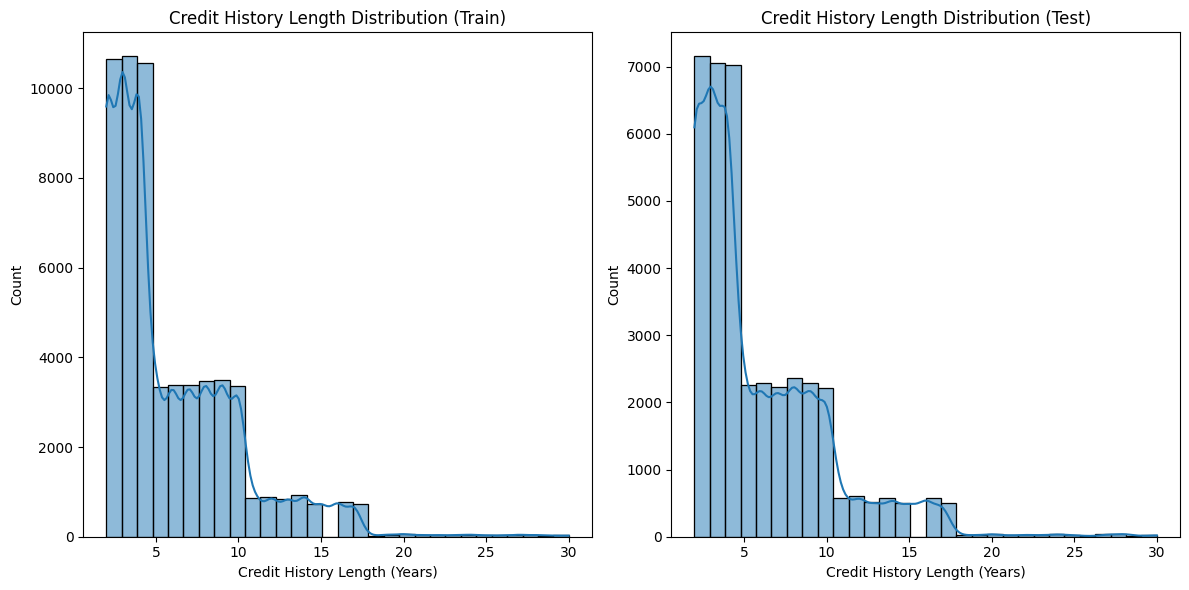

In [58]:
plt.figure(figsize=(12, 6))

# Train 데이터의 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(train['cb_person_cred_hist_length'], bins=30, kde=True)
plt.xlabel('Credit History Length (Years)')
plt.title('Credit History Length Distribution (Train)')

# Test 데이터의 히스토그램
plt.subplot(1, 2, 2)
sns.histplot(test['cb_person_cred_hist_length'], bins=30, kde=True)
plt.xlabel('Credit History Length (Years)')
plt.title('Credit History Length Distribution (Test)')

plt.tight_layout()
plt.show()

In [59]:
# 구간 나누기
bins_cred_hist_length = [1, 5, 11, float('inf')]  # 1~4년, 5~10년, 11년 이상
labels_cred_hist_length = ['1-4 years', '5-10 years', '11+ years']

# Train 데이터에 구간 적용
train['cb_person_cred_hist_length'] = pd.cut(train['cb_person_cred_hist_length'], bins=bins_cred_hist_length, labels=labels_cred_hist_length, right=False)

# Test 데이터에도 동일한 구간 적용
test['cb_person_cred_hist_length'] = pd.cut(test['cb_person_cred_hist_length'], bins=bins_cred_hist_length, labels=labels_cred_hist_length, right=False)

# Ordinal Encoding 매핑
ordinal_mapping = {'1-4 years': 0, '5-10 years': 1, '11+ years': 2}

# Train 데이터에 Ordinal Encoding 적용 (기존 열에 덮어쓰기)
train['cb_person_cred_hist_length'] = train['cb_person_cred_hist_length'].map(ordinal_mapping)

# Test 데이터에도 동일한 인코딩 적용 (기존 열에 덮어쓰기)
test['cb_person_cred_hist_length'] = test['cb_person_cred_hist_length'].map(ordinal_mapping)

### final refining

In [60]:
non_numeric_columns = train.select_dtypes(exclude=['number']).columns
non_numeric_columns

Index(['cb_person_cred_hist_length', 'home_MORTGAGE', 'home_OTHER', 'home_OWN',
       'home_RENT', 'emp_length_encoded', 'intent_DEBTCONSOLIDATION',
       'intent_EDUCATION', 'intent_HOMEIMPROVEMENT', 'intent_MEDICAL',
       'intent_PERSONAL', 'intent_VENTURE'],
      dtype='object')

In [61]:
# True/False 값을 0과 1로 변환하고 명시적으로 다운캐스팅 처리
train = train.replace({True: 1, False: 0}).infer_objects(copy=False)
test = test.replace({True: 1, False: 0}).infer_objects(copy=False)

C:\Users\PhamPham\AppData\Local\Temp\ipykernel_9800\241822497.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train = train.replace({True: 1, False: 0}).infer_objects(copy=False)
C:\Users\PhamPham\AppData\Local\Temp\ipykernel_9800\241822497.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test = test.replace({True: 1, False: 0}).infer_objects(copy=False)


In [62]:
# cb_person_cred_hist_length와 emp_length_encoded를 명시적으로 int64로 변환
train['cb_person_cred_hist_length'] = train['cb_person_cred_hist_length'].astype('int64')
train['emp_length_encoded'] = train['emp_length_encoded'].astype('int64')

# non-numeric 컬럼 확인
non_numeric_columns = train.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index([], dtype='object')


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   loan_grade                     58645 non-null  int64  
 1   cb_person_default_on_file      58645 non-null  int64  
 2   cb_person_cred_hist_length     58645 non-null  int64  
 3   loan_status                    58645 non-null  int64  
 4   age_group_encoded              58645 non-null  int8   
 5   person_income_scaled           58645 non-null  float64
 6   high_income_flag               58645 non-null  int32  
 7   home_MORTGAGE                  58645 non-null  int64  
 8   home_OTHER                     58645 non-null  int64  
 9   home_OWN                       58645 non-null  int64  
 10  home_RENT                      58645 non-null  int64  
 11  emp_length_encoded             58645 non-null  int64  
 12  intent_DEBTCONSOLIDATION       58645 non-null 

# Modeling

In [64]:
import os
import json
import joblib
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [65]:
# 하이퍼파라미터와 성능을 파일로 저장하는 함수
def save_to_file(data, file_name):
    # 파일이 이미 존재하는 경우 덮어쓰기
    with open(file_name, 'w') as f:
        json.dump(data, f, indent=4)

In [66]:
# Feature와 Target 설정
X = train.drop(columns=['loan_status'])
y = train['loan_status']

# Stratified K-Fold 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### 1단계: 각 모델에 대한 RandomizedSearchCV로 하이퍼파라미터 탐색

In [67]:
# CatBoost 하이퍼파라미터 범위
param_dist_catboost = {
    'classifier__iterations': np.random.randint(500, 2000, size=10),
    'classifier__depth': np.random.randint(4, 12, size=5),
    'classifier__learning_rate': np.random.uniform(0.01, 0.2, size=10),
    'classifier__l2_leaf_reg': np.random.uniform(1, 10, size=10),
    'classifier__bagging_temperature': np.random.uniform(0.1, 1.0, size=5),
    'classifier__random_strength': np.random.uniform(0.1, 2.0, size=5)
}

# XGBoost 하이퍼파라미터 범위
param_dist_xgboost = {
    'classifier__n_estimators': np.random.randint(500, 1500, size=10),
    'classifier__max_depth': np.random.randint(3, 10, size=5),
    'classifier__learning_rate': np.random.uniform(0.01, 0.2, size=10),
    'classifier__subsample': np.random.uniform(0.5, 1.0, size=5),
    'classifier__colsample_bytree': np.random.uniform(0.5, 1.0, size=5),
    'classifier__gamma': np.random.uniform(0, 5, size=5)
}

# RandomForest 하이퍼파라미터 범위
param_dist_rf = {
    'classifier__n_estimators': np.random.randint(100, 1000, size=10),
    'classifier__max_depth': np.random.randint(5, 20, size=5),
    'classifier__min_samples_split': np.random.randint(2, 20, size=5),
    'classifier__min_samples_leaf': np.random.randint(1, 10, size=5)
}

# MLP 하이퍼파라미터 범위
param_dist_mlp = {
    'classifier__hidden_layer_sizes': [(np.random.randint(50, 200), np.random.randint(50, 200)) for _ in range(10)],
    'classifier__learning_rate_init': np.random.uniform(0.0001, 0.1, size=10),
    'classifier__alpha': np.random.uniform(0.0001, 0.1, size=10),
    'classifier__max_iter': [500, 1000, 1500]
}

# 모델과 하이퍼파라미터 설정
models = {
    "CatBoost": (CatBoostClassifier(verbose=100, eval_metric='AUC', early_stopping_rounds=50), param_dist_catboost),
    "XGBoost": (XGBClassifier(objective='binary:logistic', eval_metric='auc', early_stopping_rounds=50), param_dist_xgboost),
    "RandomForest": (RandomForestClassifier(), param_dist_rf),
    "MLP": (MLPClassifier(early_stopping=True), param_dist_mlp)
}

In [ ]:
best_params = {}
best_scores = {}
best_models = {}

# RandomizedSearchCV 실행
for model_name, (model, param_dist) in models.items():
    print(f"Running RandomizedSearch for {model_name}...")

    # 파이프라인 구성 (SMOTE + 모델)
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),  # SMOTE 적용
        ('classifier', model)  # 모델 적용
    ])

    # RandomizedSearchCV 설정
    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=50,
        cv=skf,
        scoring='roc_auc',
        random_state=42,
        verbose=2
    )

    # RandomizedSearchCV 실행
    random_search.fit(X, y)

    # 최적의 파라미터와 성능 저장
    best_params[model_name] = random_search.best_params_
    best_scores[model_name] = random_search.best_score_
    best_models[model_name] = random_search.best_estimator_

    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best AUC-ROC score for {model_name}: {random_search.best_score_}")
    print("-" * 50)

Running RandomizedSearch for CatBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
0:	total: 153ms	remaining: 4m 55s
100:	total: 1.37s	remaining: 24.8s
200:	total: 2.76s	remaining: 23.8s
300:	total: 3.8s	remaining: 20.6s
400:	total: 4.9s	remaining: 18.7s
500:	total: 6.3s	remaining: 18s
600:	total: 7.37s	remaining: 16.3s
700:	total: 8.66s	remaining: 15.2s
800:	total: 10.1s	remaining: 14.3s
900:	total: 11.4s	remaining: 13.1s
1000:	total: 12.7s	remaining: 11.9s
1100:	total: 14s	remaining: 10.6s
1200:	total: 15.2s	remaining: 9.29s
1300:	total: 16.4s	remaining: 7.99s
1400:	total: 17.9s	remaining: 6.8s
1500:	total: 19.2s	remaining: 5.54s
1600:	total: 20.4s	remaining: 4.25s
1700:	total: 21.6s	remaining: 2.96s
1800:	total: 22.9s	remaining: 1.69s
1900:	total: 24.2s	remaining: 420ms
1933:	total: 24.6s	remaining: 0us
[CV] END classifier__bagging_temperature=0.5061916912635497, classifier__depth=4, classifier__iterations=1934, classifier__l2_leaf_reg=1.084419153968296, classifi

### 2단계: 각 모델에 대해 GridSearchCV로 세밀한 튜닝

In [ ]:
grid_search_models = {}

# CatBoost의 최적 하이퍼파라미터를 바탕으로 모든 항목을 좁은 범위로 세밀한 그리드 탐색
param_grid_catboost = {
    'classifier__iterations': [best_params['CatBoost']['classifier__iterations'] - 100, best_params['CatBoost']['classifier__iterations'], best_params['CatBoost']['classifier__iterations'] + 100],
    'classifier__depth': [best_params['CatBoost']['classifier__depth'] - 1, best_params['CatBoost']['classifier__depth'], best_params['CatBoost']['classifier__depth'] + 1],
    'classifier__learning_rate': [best_params['CatBoost']['classifier__learning_rate'] * 0.9, best_params['CatBoost']['classifier__learning_rate'], best_params['CatBoost']['classifier__learning_rate'] * 1.1],
    'classifier__l2_leaf_reg': [best_params['CatBoost']['classifier__l2_leaf_reg'] * 0.9, best_params['CatBoost']['classifier__l2_leaf_reg'], best_params['CatBoost']['classifier__l2_leaf_reg'] * 1.1],
    'classifier__bagging_temperature': [best_params['CatBoost']['classifier__bagging_temperature'] * 0.9, best_params['CatBoost']['classifier__bagging_temperature'], best_params['CatBoost']['classifier__bagging_temperature'] * 1.1],
    'classifier__random_strength': [best_params['CatBoost']['classifier__random_strength'] * 0.9, best_params['CatBoost']['classifier__random_strength'], best_params['CatBoost']['classifier__random_strength'] * 1.1]
}

# XGBoost 하이퍼파라미터에 대해서도 모든 항목을 좁은 범위로 탐색
param_grid_xgboost = {
    'classifier__n_estimators': [best_params['XGBoost']['classifier__n_estimators'] - 100, best_params['XGBoost']['classifier__n_estimators'], best_params['XGBoost']['classifier__n_estimators'] + 100],
    'classifier__max_depth': [best_params['XGBoost']['classifier__max_depth'] - 1, best_params['XGBoost']['classifier__max_depth'], best_params['XGBoost']['classifier__max_depth'] + 1],
    'classifier__learning_rate': [best_params['XGBoost']['classifier__learning_rate'] * 0.9, best_params['XGBoost']['classifier__learning_rate'], best_params['XGBoost']['classifier__learning_rate'] * 1.1],
    'classifier__subsample': [best_params['XGBoost']['classifier__subsample'] * 0.9, best_params['XGBoost']['classifier__subsample'], best_params['XGBoost']['classifier__subsample'] * 1.1],
    'classifier__colsample_bytree': [best_params['XGBoost']['classifier__colsample_bytree'] * 0.9, best_params['XGBoost']['classifier__colsample_bytree'], best_params['XGBoost']['classifier__colsample_bytree'] * 1.1],
    'classifier__gamma': [best_params['XGBoost']['classifier__gamma'] * 0.9, best_params['XGBoost']['classifier__gamma'], best_params['XGBoost']['classifier__gamma'] * 1.1]
}

# RandomForest 하이퍼파라미터에 대해서도 모든 항목을 좁은 범위로 탐색
param_grid_rf = {
    'classifier__n_estimators': [best_params['RandomForest']['classifier__n_estimators'] - 100, best_params['RandomForest']['classifier__n_estimators'], best_params['RandomForest']['classifier__n_estimators'] + 100],
    'classifier__max_depth': [best_params['RandomForest']['classifier__max_depth'] - 1, best_params['RandomForest']['classifier__max_depth'], best_params['RandomForest']['classifier__max_depth'] + 1],
    'classifier__min_samples_split': [best_params['RandomForest']['classifier__min_samples_split']],
    'classifier__min_samples_leaf': [best_params['RandomForest']['classifier__min_samples_leaf']]
}

# MLP 하이퍼파라미터에 대해서도 모든 항목을 좁은 범위로 탐색
param_grid_mlp = {
    'classifier__hidden_layer_sizes': [best_params['MLP']['classifier__hidden_layer_sizes']],
    'classifier__learning_rate_init': [best_params['MLP']['classifier__learning_rate_init'] * 0.9, best_params['MLP']['classifier__learning_rate_init'], best_params['MLP']['classifier__learning_rate_init'] * 1.1],
    'classifier__alpha': [best_params['MLP']['classifier__alpha']],
    'classifier__max_iter': [best_params['MLP']['classifier__max_iter']]
}

# 모델과 그리드 설정
grid_models = {
    "CatBoost": (best_models['CatBoost'], param_grid_catboost),
    "XGBoost": (best_models['XGBoost'], param_grid_xgboost),
    "RandomForest": (best_models['RandomForest'], param_grid_rf),
    "MLP": (best_models['MLP'], param_grid_mlp)
}

In [ ]:
best_final_models = {}
best_final_params = {}
best_final_scores = {}

# GridSearchCV 실행
for model_name, (model, param_grid) in grid_models.items():
    print(f"Running GridSearch for {model_name}...")
    
    # 파이프라인 구성 (SMOTE + 모델)
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),  # SMOTE 적용
        ('classifier', model)  # 모델 적용
    ])
    
    # GridSearchCV 설정
    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=skf,
        scoring='roc_auc',
        verbose=2
    )
    
    # GridSearchCV 실행
    grid_search.fit(X, y)
    
    # 최적의 파라미터, 성능, 모델 저장
    best_final_params[model_name] = grid_search.best_params_
    best_final_scores[model_name] = grid_search.best_score_
    best_final_models[model_name] = grid_search.best_estimator_
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best AUC-ROC score for {model_name}: {grid_search.best_score_}")
    print("-" * 50)

### 3단계: Early Stopping 및 최적 모델 복구

In [ ]:
best_final_models = {}

for model_name, model in best_models.items():
    print(f"Applying Early Stopping and restoring the best model for {model_name}...")

    # Early stopping 적용을 위해 각 모델에 맞는 파라미터 조정
    if model_name == "CatBoost":
        # CatBoost의 Early Stopping 및 최적 모델 복구
        final_model = CatBoostClassifier(
            **best_params[model_name],
            eval_metric="AUC",
            early_stopping_rounds=50,
            verbose=100,
            use_best_model=True  # 최적의 모델을 복구
        )
    elif model_name == "XGBoost":
        # XGBoost의 Early Stopping 및 최적 모델 복구
        final_model = XGBClassifier(
            **best_params[model_name],
            eval_metric="auc",
            early_stopping_rounds=50,
            use_label_encoder=False,
            restore_best_model=True  # 최적의 모델을 복구
        )
    elif model_name == "RandomForest":
        # RandomForest의 최적 모델 복구 (Early Stopping 없음)
        final_model = RandomForestClassifier(
            **best_params[model_name]
        )
    elif model_name == "MLP":
        # MLP의 Early Stopping 적용 및 최적 모델 복구
        final_model = MLPClassifier(
            **best_params[model_name],
            early_stopping=True
        )

    # SMOTE 적용을 포함한 파이프라인 구성
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', final_model)
    ])

    # 최적의 모델 학습
    pipeline.fit(X, y)
    best_final_models[model_name] = pipeline

    print(f"Restored best model for {model_name} with Early Stopping applied.")

### 4단계: 최종 결과 저장

In [ ]:
# 하이퍼파라미터 및 성능 스코어 저장
save_to_file(best_final_params, 'best_final_params.json')
save_to_file(best_final_scores, 'best_final_scores.json')

# 최종 모델 저장 (각각의 모델을 파일로 저장)
for model_name, model in best_final_models.items():
    joblib.dump(model, f'{model_name}_best_model.pkl')

print("최적의 하이퍼파라미터, 성능 스코어, 모델이 저장되었습니다.")